In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_43455/1299139304.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start = '2000-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_hist,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,
2025-05-28,584.377502,589.388793,583.641733,588.185673,68445500,584.377502,584.377502,0.000000,0.000000,0.000000,NaN,NaN,NaN
2025-05-29,586.684265,589.816321,582.726987,589.677105,69973300,585.626999,585.573602,0.053397,0.029665,0.023732,-1.0,0.003947,-0.003947
2025-05-30,586.028076,587.758141,579.913132,585.570678,90601200,585.783539,585.736448,0.047091,0.036807,0.010284,1.0,0.002824,-0.005061
2025-06-02,589.329102,589.408602,581.722714,584.407325,61630500,586.902735,586.736777,0.165958,0.080557,0.085401,1.0,0.008473,0.000543
2025-06-03,592.689819,593.674162,588.473954,588.961210,63606200,588.475065,588.110047,0.365018,0.165178,0.199840,1.0,0.014224,0.006249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.929833,660.334662,4.595171,6.107946,-1.512775,-1.0,0.134609,-0.071757
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.514471,660.470144,4.044327,5.695222,-1.650895,-1.0,0.133223,-0.070623
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,664.615319,660.806083,3.809236,5.318025,-1.508788,-1.0,0.138254,-0.074749


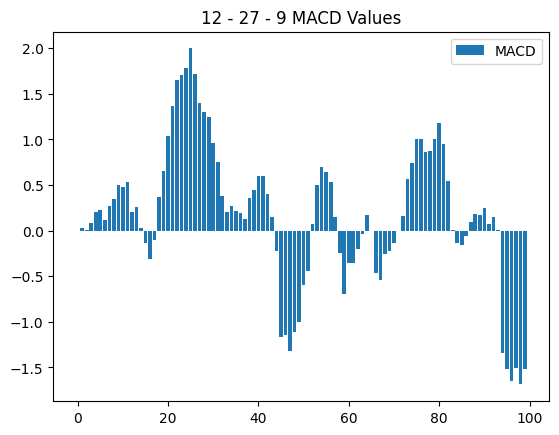

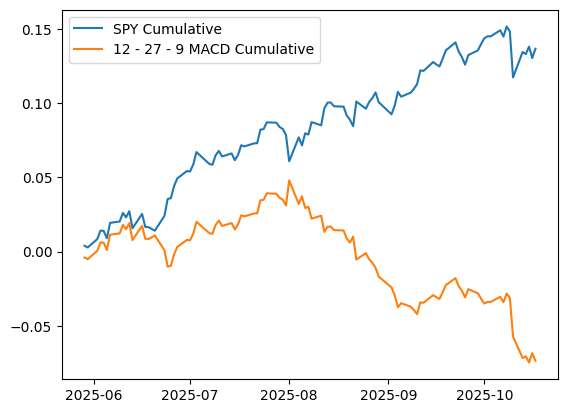

In [ ]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 1000
def get_data(ticker=TICKER):
    df = yf.download(TICKER, start = '2000-01-01')
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_MACD(df, fast=MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()
    
    #macd is the difference between the fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']
    
    #macd signal is 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span = span ).mean()
    
    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height = df['MACD_hist'])

    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Values')
    plt.legend(['MACD', 'SIGNAL'])
    
    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Cumulative'])
    return df

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

df = main()
df


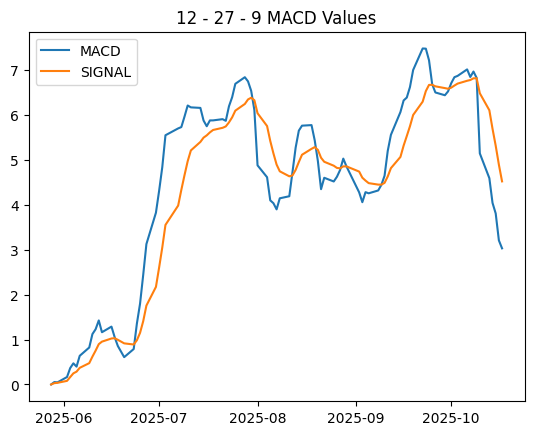

In [8]:
plt.plot(df['MACD'])
plt.plot(df['Signal'])

plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Values')
plt.legend(['MACD', 'SIGNAL'])